*Autores: Alex H. Pfoccori Quispe, Milton A. Mozo Davila*

# Método de Selección de Subconjuntos

## La Mejor Selección de Subconjuntos
Aquí aplicamos el mejor enfoque de selección de subconjuntos a los datos de los bateadores ***Hitters***. Queremos predecir el salario ***Salary*** de un jugador de béisbol a partir de varias estadísticas asociadas con el rendimiento del año anterior. En primer lugar, observamos que la variable salario ***Salary*** falta para algunos de los jugadores. La funcions ***is.na()*** puede utilizarse para identificar los observaciones que faltan. Devuelve un vector de la misma longitud que el vector de entrada, coin un valor de ***TRUE*** para los elementos que faltan y un ***FALSE*** para los elementos que no faltan. La función ***sum()*** puede utilizarse para contar todos los elementos que faltan.

In [1]:
library(ISLR)
fix(Hitters)
names(Hitters)

[1] "AtBat"     "Hits"      "HmRun"     "Runs"      "RBI"       "Walks"    
 [7] "Years"     "CAtBat"    "CHits"     "CHmRun"    "CRuns"     "CRBI"     
[13] "CWalks"    "League"    "Division"  "PutOuts"   "Assists"   "Errors"   
[19] "Salary"    "NewLeague"

In [2]:
dim(Hitters)

[1] 322  20

In [3]:
sum(is.na(Hitters$Salary))

[1] 59

Por lo tanto, vemos que falta el salario ***Salary*** de 59 jugadores. La función ***na.omit()*** elimina todas las filas en las que faltan valores en culquier variable.

In [4]:
Hitters=na.omit(Hitters)
dim(Hitters)

[1] 263  20

In [5]:
sum(is.na(Hitters))

[1] 0

La función ***regsubsets()*** (parte de la biblioteca *leaps*) realiza la selección del mejor subconjunto identificando el mejor modelo que contiene un número determinado de predictores, donde *mejor* se cuantifica utilizando ***RSS***. La sintaxis es la misma para ***lm()***. el comando ***summary()*** muestra el mejor conjunto de variables para cada tamaño de modelo.

In [6]:
library(leaps)
regfit.full=regsubsets(Salary~., Hitters)
summary(regfit.full)

Subset selection object
Call: regsubsets.formula(Salary ~ ., Hitters)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 ) " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 ) " "   "*"  " "   " "  " " " "   

Un asterisco indica que una determinada variable está incluida en el modelo correspondiente. Por ejemplo, esta salida indica que el mejor modelo de dos variables contiene sólo ***Hits*** y ***CRBI***. Por defecto, ***regsubsets()*** sólo informa de los resultados hasta el mejor modelo de ocho variables. Pero se puede utilizar la opción ***nvmax*** para devolver tantas variables como se desee. Aquí ajustamos hsta un modelo de 19 variables.

In [7]:
regfit.full=regsubsets(Salary~., data=Hitters, nvmax=19)
reg.summary=summary(regfit.full)

La función ***summary()*** también devuelve ***R2, RSSS, R2 ajustado, Cp y BIC***.
Podemos examinarlo para intentar seleccionar el mejor modelo global.

In [8]:
names(reg.summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

Por ejemplo, vemos que el estadístico ***R2*** aumenta del 32%, cuando sólo se incluye una variabel en el modelo, a casi el 55%, cuando se incluyen todas las variables. Como se esperaba, el estadístico ***R2*** aumenta monótonamente a medida que se incluyen más variables

In [9]:
reg.summary$rsq

[1] 0.3214501 0.4252237 0.4514294 0.4754067 0.4908036 0.5087146 0.5141227
 [8] 0.5285569 0.5346124 0.5404950 0.5426153 0.5436302 0.5444570 0.5452164
[15] 0.5454692 0.5457656 0.5459518 0.5460945 0.5461159

El trazado de ***RSS, R2 ajustado, Cp*** y ***BIC*** para todos los modelos a la vez nos ayudará a decidir qué modelo seleccionar. Tenga en cuenta que la opción ***type="l"*** indica que ***R*** que conecte los puntos trazados con líneas.

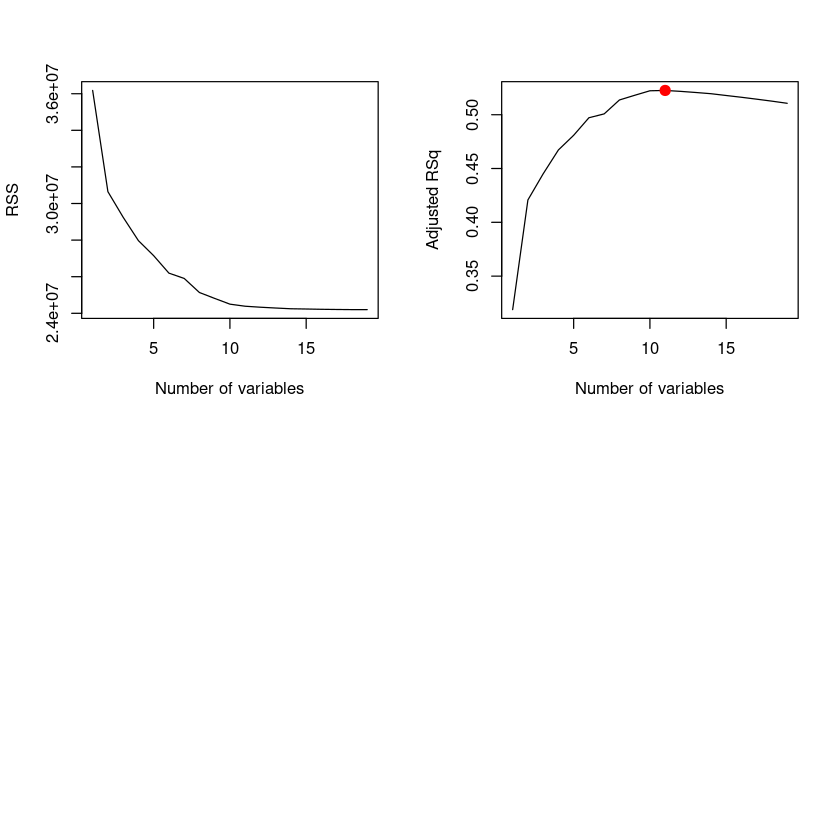

In [10]:
par(mfrow=c(2,2))
plot(reg.summary$rss, xlab="Number of variables", ylab="RSS", type="l")
plot(reg.summary$adjr2, xlab="Number of variables", ylab="Adjusted RSq", type="l")
points(11, reg.summary$adjr2[11], col="red", cex=2, pch=20)

El comando ***points()*** funciona como el comando ***plot()***, excepto que pone puntos en su gráfica ya creado, en lugar de crear un nuevo gráfico. La función ***which.max()*** puede utilizarse para identificar la ubicación de le punto máximo d eun vector. Ahora trazaremos un punto rojo para indicar el modelo con el mayor ***R2 ajustado***.

In [11]:
which.max(reg.summary$adjr2)

[1] 11

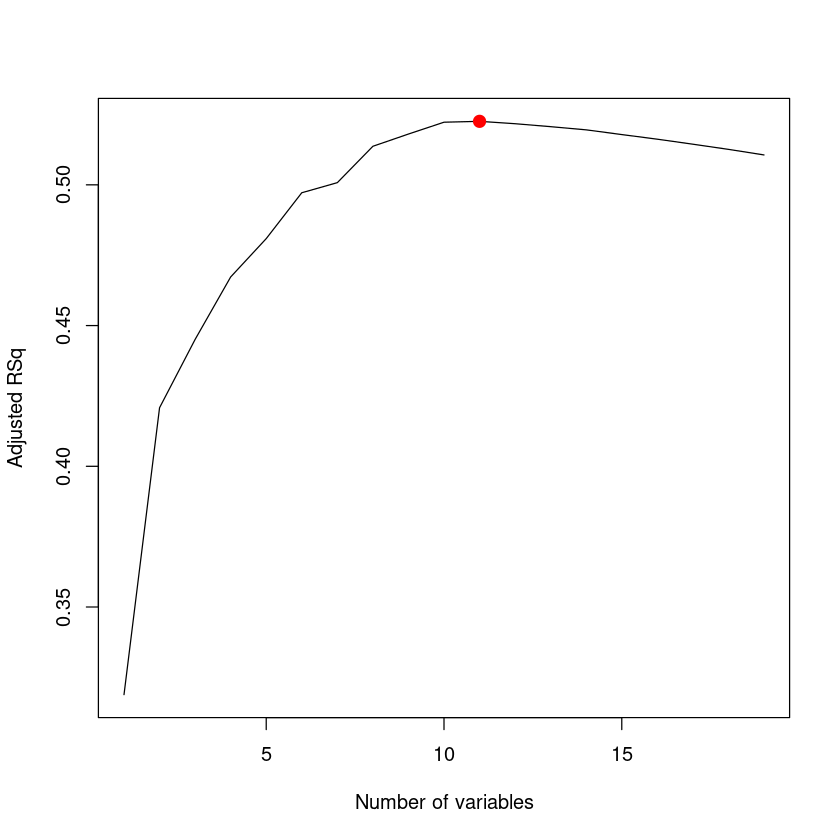

In [12]:
plot(reg.summary$adjr2, xlab="Number of variables", ylab="Adjusted RSq", type="l")
points(11, reg.summary$adjr2[11], col="red", cex=2, pch=20)

De forma similar, podemos trazar los estadísticos ***Cp*** y ***BIC***, e indicar los modelos con el menor estadístico utilizando ***which.min()***.

[1] 10

[1] 6

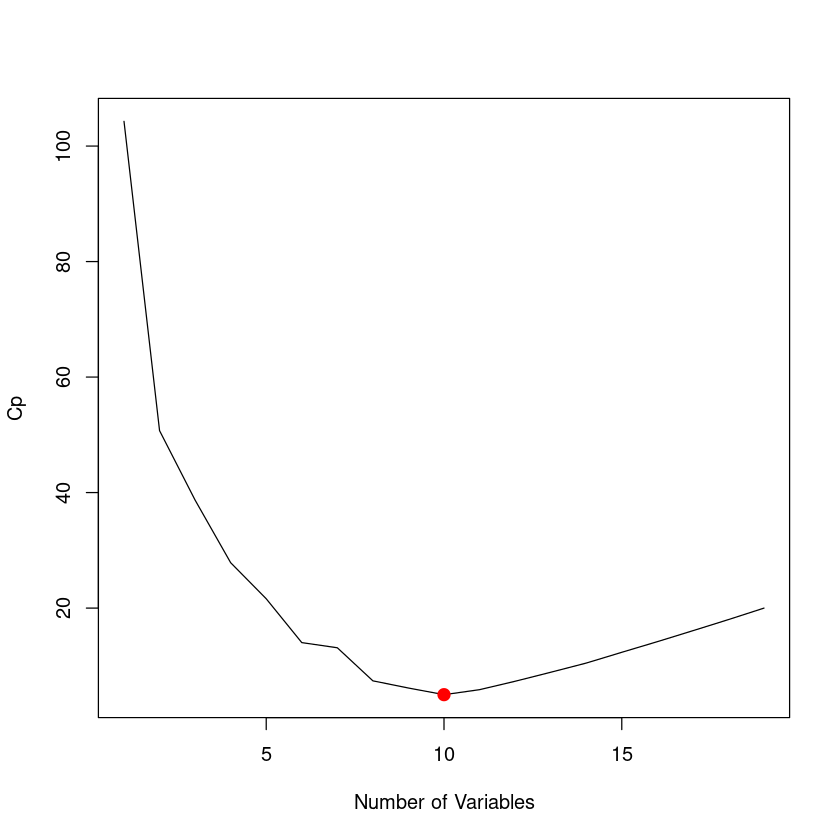

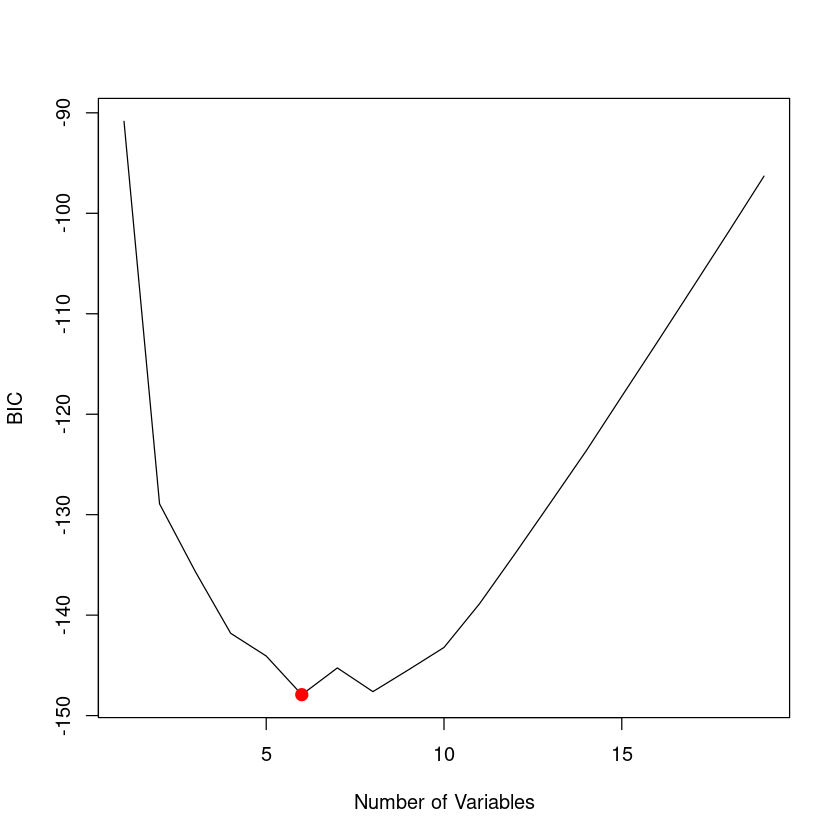

In [13]:
plot(reg.summary$cp, xlab="Number of Variables", ylab="Cp", type="l")
which.min(reg.summary$cp)
points(10, reg.summary$cp[10], col="red", cex=2, pch=20)
which.min(reg.summary$bic)
plot(reg.summary$bic, xlab="Number of Variables", ylab="BIC", type="l")
points(6, reg.summary$bic[6], col="red", cex=2, pch=20)

La función ***regsubsets()*** tiene un comando ***plot()*** incorporado que se puede utilizar para mostrar las variables seleccionadas para el mejor modelo con un número de prdictores, clasificados según el BIC, Cp, R2 ajustado o AIC. Para obtener más información sobre esta función, escriba ***?plot.regsubsets***.

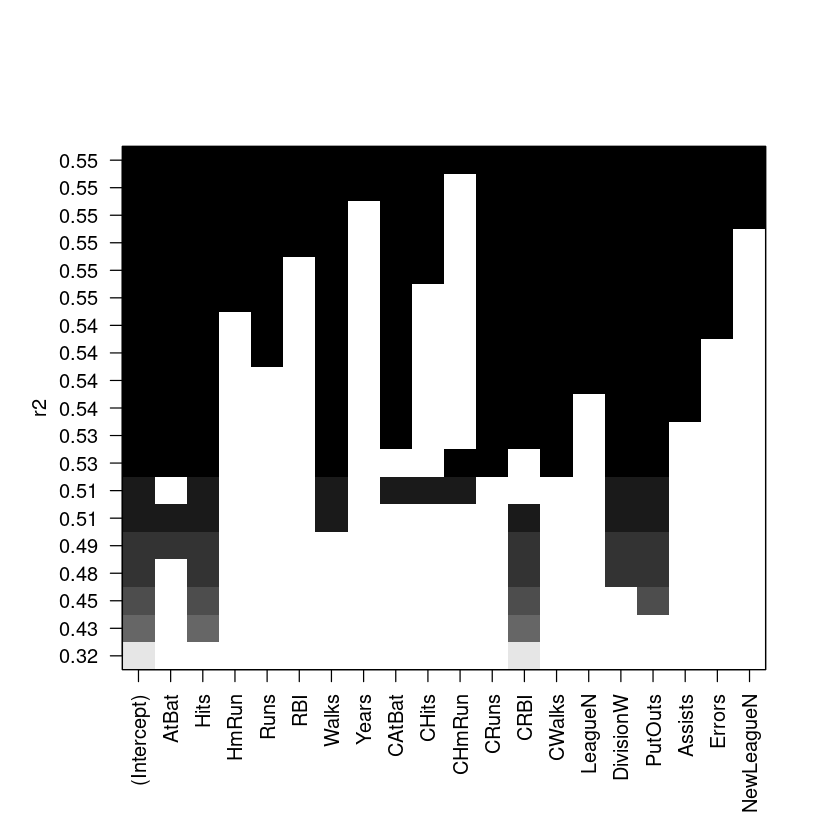

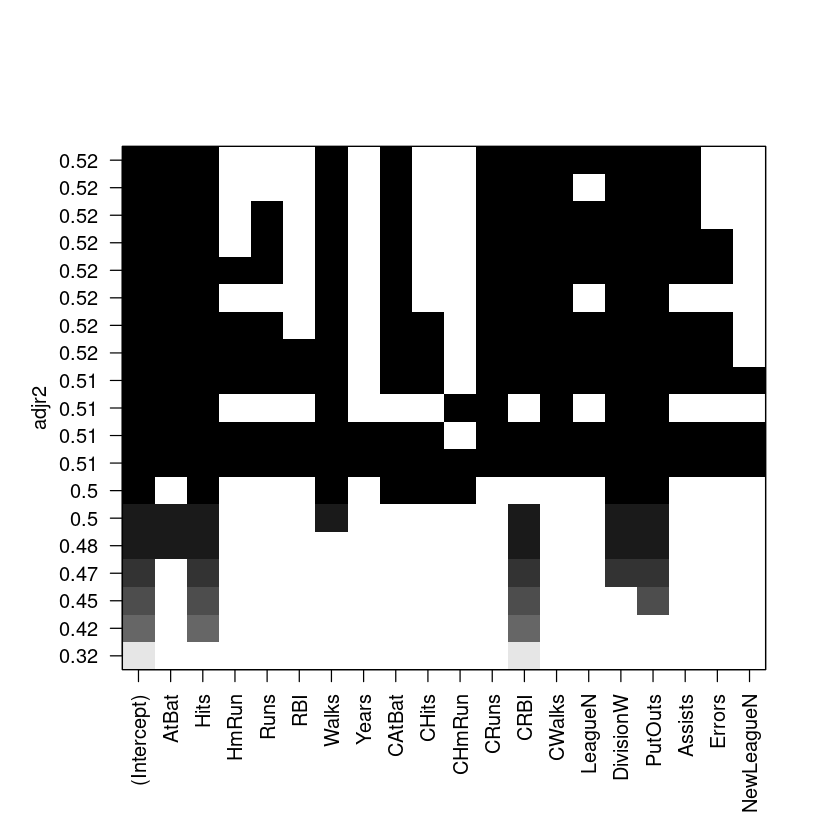

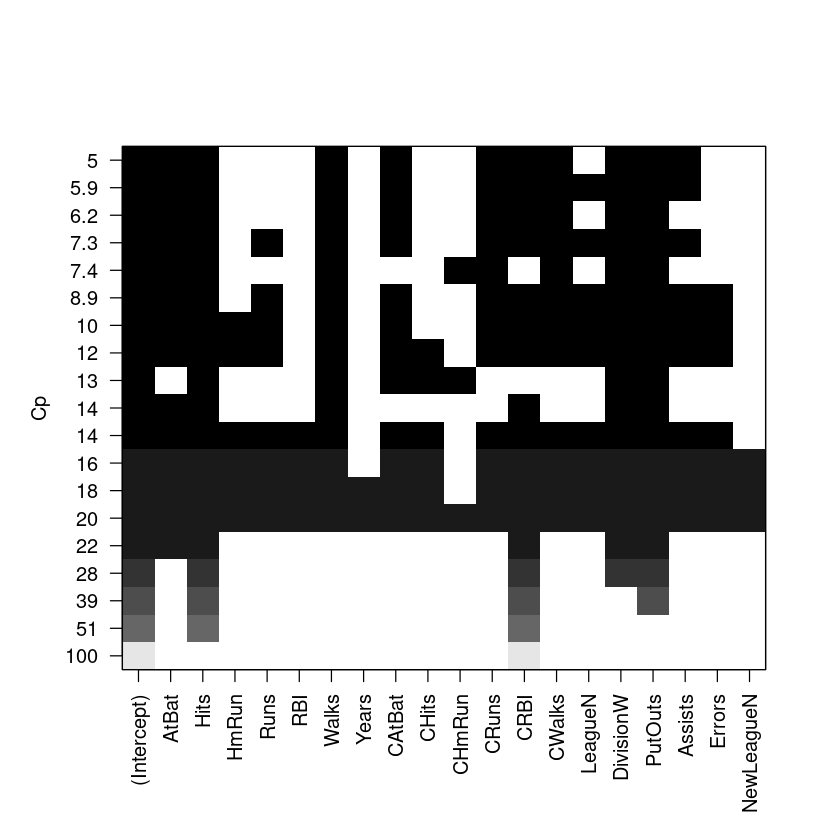

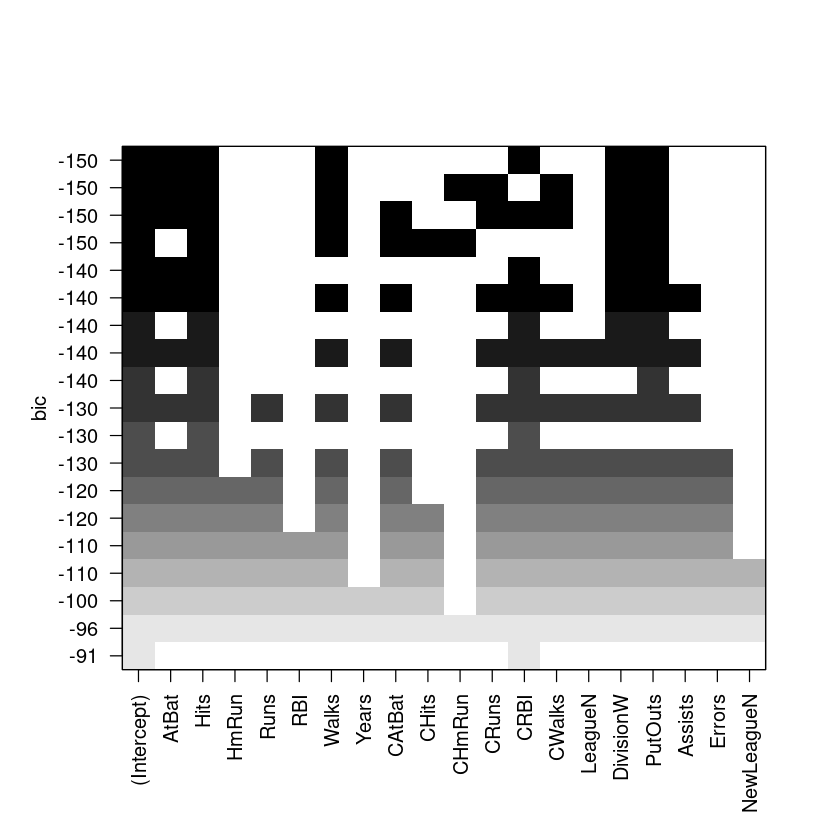

In [14]:
plot(regfit.full, scale="r2")
plot(regfit.full, scale="adjr2")
plot(regfit.full, scale="Cp")
plot(regfit.full, scale="bic")

La fila superior de cada gráfico contiene un cuadro negro para cada variable seleccionada según el modelo óptimo asociado a ese estadística. Por ejemplo, vemos que varios modelos comparten un BIC cercano a -150. Sin embargo, el modelo con el BIC más bajo es el modelo de seis variables que contiene sólo ***AtBat, Hits, Walks, CRBI, DivisionW*** y ***PuOuts***. Podemos utilizar la función ***coef()*** para ver las estimaciones de los coeficientes a este modelo.

In [15]:
coef(regfit.full, 6)

(Intercept)        AtBat         Hits        Walks         CRBI    DivisionW 
  91.5117981   -1.8685892    7.6043976    3.6976468    0.6430169 -122.9515338 
     PutOuts 
   0.2643076

## Selección por Pasos Hacia Delante y Hacia Atrás

También podmeos utilizar la función ***regsubsets()*** para realizar una selección por pasos hacia adelante o hacia atrás, utilizando el argumento ***method="forward"*** o ***method="backward"***.

In [16]:
regfit.fwd=regsubsets(Salary~., data=Hitters, nvmax=19, method="forward")
summary(regfit.fwd)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19, method = "forward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: forward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2 

In [17]:
regfit.bwd=regsubsets(Salary~., data=Hitters, nvmax=19, method="backward")
summary(regfit.bwd)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19, method = "backward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: backward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    "*"   " " 


Por ejemplo, vemos que utilizando la selección progresiva, el mejor modelo de una variable sólo ***CRBI***, y el mejor modelo de dos variables incluye además ***Hits***. Para estos datos, los mejores modleos de una a seis variables son idéticos para el  mejor subconjunto y la selección directa. Sin embargo, los mejores modelos de siete variables identificados por la lección escalonada hacia adelante, la selección escalonada hacia atrás y la selección del mejor subconjunto son diferentes.

In [18]:
coef(regfit.full, 7)

(Intercept)         Hits        Walks       CAtBat        CHits       CHmRun 
  79.4509472    1.2833513    3.2274264   -0.3752350    1.4957073    1.4420538 
   DivisionW      PutOuts 
-129.9866432    0.2366813

In [19]:
coef(regfit.fwd, 7)

(Intercept)        AtBat         Hits        Walks         CRBI       CWalks 
 109.7873062   -1.9588851    7.4498772    4.9131401    0.8537622   -0.3053070 
   DivisionW      PutOuts 
-127.1223928    0.2533404

In [20]:
coef(regfit.bwd, 7)

(Intercept)        AtBat         Hits        Walks        CRuns       CWalks 
 105.6487488   -1.9762838    6.7574914    6.0558691    1.1293095   -0.7163346 
   DivisionW      PutOuts 
-116.1692169    0.3028847

## Elección de Modelos Mediante el Conjunto de Validación Enfoque y Validación Cruzada

Acabamos de ver que es posible elegir entre un conjutno de modelos de diferentes tamaños utilizando Cp, BIC, y R2 ajustado. Ahora consideraremos cómo hacer esto utilizando el conjunto de validaciones y los enfoques de validación cruzada.
Para que estos enfoques produzcan estimaciones precisas del error de prueba, debemos utilizar sólo las observaciones de entrenamiento para realziar todos los aspectos del ajuste del modelo, incluida la selección de variables. Por lo tanto, la determinación de qué modelo de un tamaño determinado es el mejor debe hacerse utilizando sólo las observaciones de entrenamiento. Este punto es sutil pero importante. Si se utiliza el conjunto de datos completo para realizar el paso de selección del mejor subconjunto, los errores del conjunto de validación y los errores de validación cruzada que obtengamos no serán estimaciones precisas del error de prueba.
Para utilizar el enfoque del conjunto de validación, empezamos por dividir las observaciones en un conjunto de entrenamiento y un conjunto de prueba. Lo hacemos creando un vector aleatorio, ***train***, de elementos iguales a ***TRUE***, ***FALSE**** en caso contrario. El vector ***test***, y un ***FALSE*** es caso contrario. Obsérvese que ***!*** en el comando ***test*** hace que los ***TRUE***s se conviertan en ***FALSE***s y viceversa. También establecemos una semilla aleatoria para que el usuario obtenga la misma división de cojunto de entrenamiento/conjunto de prueba.

In [21]:
set.seed(1)
train=sample(c(TRUE, FALSE), nrow(Hitters), rep=TRUE)
test=(!train)

Ahora aplicamos ***regsubsets()*** al conjutno de entrenamiento para realizar la mejor selección de subconjuntos.

In [22]:
regfit.best=regsubsets(Salary~., data=Hitters[train,], nvmax=19)

Obsérvese que en la llamada se ha sub-configurado el marco de datos de Hitters directamente para acceder sólo al subconjunto de datos de entrenamiento, utilizando la expresión ***Hitters[train]***. Ahora calculamos el error del conjunto de validación para el mejor modelo de cada tamaño de modelo. Primero haceoms una matriz de modelo a partir de lso datos de prueba.

In [23]:
test.mat=model.matrix(Salary~., data=Hitters[test,])

La función ***model.matriz()*** se utiliza en muchos paquetes de regresión para contruir una matriz "X" a partir de los datos. Ahora ejecutamos un bucle, y para cada tamaño i, extraemos los coeficientes de ***regfit.best*** para el mejor modelo de ese tamaño, los multiplicamos en las columnas apropiadas de la matriz del modelo de prueba para formar las predicciones, y calculamos el MSE de la prueba.

In [24]:
val.errors=rep(NA,19)
for(i in 1:19) {
    coefi=coef(regfit.best, id=i)
    pred=test.mat[, names(coefi)]%*%coefi
    val.errors[i]=mean((Hitters$Salary[test]-pred)^2)
}

Encontramos que el mejor modelo es el que contiene diez variables

In [25]:
val.errors

[1] 164377.3 144405.5 152175.7 145198.4 137902.1 139175.7 126849.0 136191.4
 [9] 132889.6 135434.9 136963.3 140694.9 140690.9 141951.2 141508.2 142164.4
[17] 141767.4 142339.6 142238.2

In [26]:
which.min(val.errors)

[1] 7

In [27]:
coef(regfit.best, 7)

(Intercept)        AtBat         Hits        Walks        CRuns       CWalks 
  67.1085369   -2.1462987    7.0149547    8.0716640    1.2425113   -0.8337844 
   DivisionW      PutOuts 
-118.4364998    0.2526925

Esto fue un poco tedioso, en parte porque no hay un método ***predict()*** para ***regsubsets()***. Como vamos a utilizar esta función de nuevo, podemos capturar nuestros pasos anteriores y escribir nuestro propio método ***predict***.

In [28]:
predict.regsubsets=function(object, newdata, id, ...) {
    form=as.formula(object$call[[2]])
    mat=model.matrix(form, newdata)
    coefi=coef(object, id=id)
    xvars=names(coefi)
    mat[,xvars]%*%coefi
}

Nuestra función imita en gran medida lo que hicimos anteriormente. La única parte compleja es cómo hemos extraído la formula utilizando en la llamada ***regsubsets()***. Demostramos cómo usamos esta función a continuación, cuando hacemos la validación cruzada.
Finalmente, realizamos la selección del mejor subconjunto en el conjunto de datos completo, y seleccionamos el mejor modelo de diez variables. Es importante que utilicemos el conjunto de datos completo y seleccionamos el mejor modelo de diez variables, en lugar de simplemente las variables que otuvieron del conjunto de entrenamiento, porque el mejor modelo de diez variables en el conjunto de datos completo puede diferir del modelo correspondiente en el conjunto de entrenamiento.

In [29]:
regfit.best=regsubsets(Salary~., data=Hitters, nvmax=19)
coef(regfit.best, 10)

(Intercept)        AtBat         Hits        Walks       CAtBat        CRuns 
 162.5354420   -2.1686501    6.9180175    5.7732246   -0.1300798    1.4082490 
        CRBI       CWalks    DivisionW      PutOuts      Assists 
   0.7743122   -0.8308264 -112.3800575    0.2973726    0.2831680

De hecho, vemos que el mejor modelo de diez variables en el conjutno de datos completo tiene un conjunto diferente de variables que el mejor modelo de diez variables en el conjunto de entrenamiento.
Ahora intentamos elegir entre los modelos de diferentes tamaños utilizando la validación cruzada. Este enfoque es algo complicado, ya que debemos realizar la selección dle mejor subconjunto dentro de cada uno de los k conjuntos de entrenamiento. A pesar de esto, vemos que con su inteligente sintaxis de subconjuntos, ***R*** hace este trabajo bastante fácil.
En primer lugar, creamos un vector que asigna cada observación a uno de lo k=10 pliegues, y creamos una matriz en la que almacenaremos los resultados.

In [30]:
k=10
set.seed(1)
folds=sample(1:k, nrow(Hitters), replace=TRUE)
cv.errors=matrix(NA, k, 19, dimnames=list(NULL, paste(1:19)))

Ahora escribimos un buclie ***for*** que realiza la validación cruzada. En j0 pliegue, los elementos de los pliegues ***folds***, que son iguales a ***j*** están en el conjunto de prueba, y el resto están en el conjunto de entrenamiento.
Hacemos nuestras predicciones para cada tamaño de modelo (usando nuestro nuevo método ***predict()***), calculamos los errores de prueba en el subconjunto apropiado y los almacenamos en la ranura apropiada de la matriz ***cv.errors***.

In [31]:
for(j in 1:k) {
    best.fit=regsubsets(Salary~., data=Hitters[folds!=j,], nvmax=19)
    for(i in 1:19) {
        pred=predict(best.fit, Hitters[folds==j,], id=i)
        cv.errors[j,i]=mean((Hitters$Salary[folds==j]-pred)^2)
    }
}

Esto nos ha dado una matriz de 10x19, cuyo elementos (i,j) corresponde al MSE de prueba para el i-ésimo pliegue de validación cruzada para el mejor modelode j variables. Utilizamos la función ***apply()*** para promediar las columnas de esta matriz con el fin de obtener un vector cuyo elemento j es error de validación para el modelo de j variables.

In [32]:
mean.cv.errors=apply(cv.errors, 2, mean)
mean.cv.errors

1        2        3        4        5        6        7        8 
149821.1 130922.0 139127.0 131028.8 131050.2 119538.6 124286.1 113580.0 
       9       10       11       12       13       14       15       16 
115556.5 112216.7 113251.2 115755.9 117820.8 119481.2 120121.6 120074.3 
      17       18       19 
120084.8 120085.8 120403.5

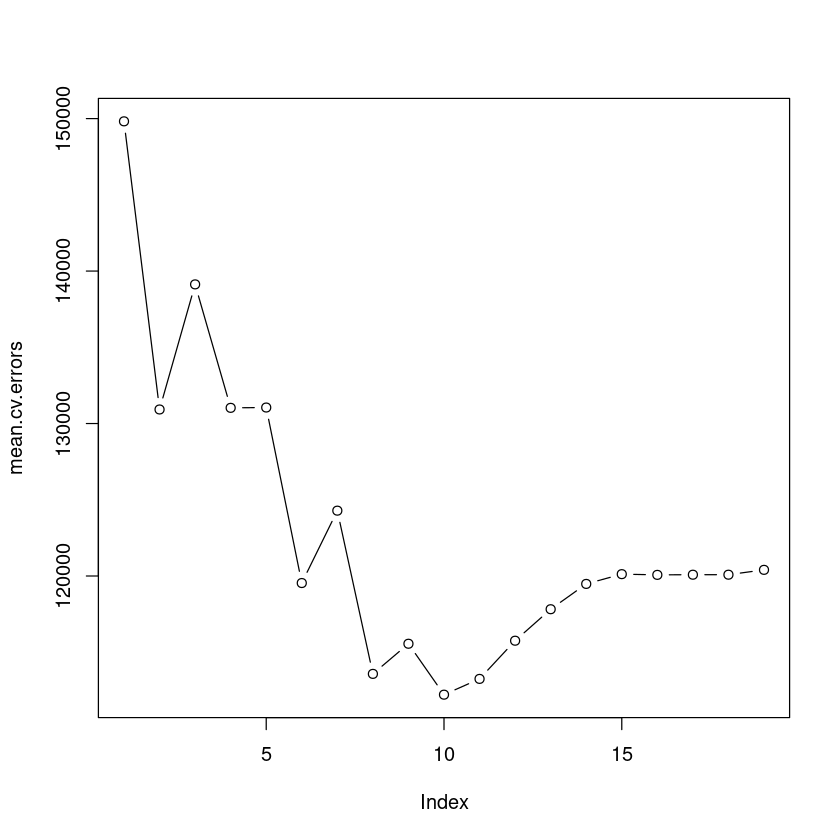

In [33]:
par(mfrow=c(1,1))
plot(mean.cv.errors, type='b')

Veamos que la validación cruzada selecciona un modelo de 11 variables. Ahora realizamos una selección del mejor subconjunto en el conjunto de datos completo para obtener el modelo de 11 variables.

In [34]:
reg.best=regsubsets(Salary~., data=Hitters, nvmax=19)
coef(reg.best, 11)

(Intercept)        AtBat         Hits        Walks       CAtBat        CRuns 
 135.7512195   -2.1277482    6.9236994    5.6202755   -0.1389914    1.4553310 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
   0.7852528   -0.8228559   43.1116152 -111.1460252    0.2894087    0.2688277

# Regresión de Cresta y el Lazo

Utilizaremos el paquete ***glmnet*** para realizar la regresión de cresta y el lazo. La función principal de este paquete es ***glmnet()***, que puede utilizarse para ajustar modelos de regresión de cresta, modelo de lazo, etc. Esta función tiene una sintaxis ligeramente diferente a la de otras funciones de ajuste de modelos que hemos encontrado hasta ahora en este libro. En particular, debemos pasar una matriz ***X*** así como un vector ***Y***, y no utilizamos la sitaxis ***Y~X***. Ahora realizaremos la regresión de cresta y el lazo para predecir el salario ***Salary*** en los datos de los bateadores ***Hitters***. Antes de proceder, asegúrese de que los valores perdidos se han eliminado de los datos.

In [35]:
x=model.matrix(Salary~., Hitters)[,-1]
y=Hitters$Salary

La función ***model.matrix()*** es especialmente útil para crear ***x***; no sólo produce una matriz correspondiente a los 19 predictores, sino que también transforma automáticamente las variables cualitativas en variables ficticias. Esta última propiedad es importante porque ***glmnet()*** sólo puede tomar entradas numéricas, cuantitativas.

## Regresión de Cresta

La función ***glmnet()*** tiene un argumento alfa que determina el tipo de modelo se ajusta. Si ***alpha=0***, se ajusta un modelo de regresión de cresta, y si ***alpha=1*** entonces se ajusta un modleo de lazo. Primero ajustamos un modelo de regresión de cresta.

In [36]:
library(glmnet)
grid=10^seq(10, -2, length=100)
ridge.mod=glmnet(x, y, alpha=0, lambda=grid)

Loading required package: Matrix

Loaded glmnet 4.1-4



Por defecto, la función ***glmnet()*** realiza una regresión de cresta para un rango de valores lambda seleccionado automáticamente. Sin embargo, aquí hemos optado por implementar la función sobre una cuadrícula de valores que van de lambda = 1010, a lambda = 10-E2, cubriendo escencialmente toda la gama de escenarios ajuste por mínimo cuadrados. Como veremos, también podmeos calcular los originales de la cuadrícula, de la cuadrícula original. Tenga en cuenta que por defecto, la función ***glmnet()*** estandaríza las variables para que estén en la misma escala. Para desactivar esta configuración por defecto utilice el argumento ***standardize=FALSE***. Asociado a cada valor de lambda hay un vector de coeficientes de regresión de cresta, almacenado en un matriz a la que se puede acceder mediante ***coef()***. En este caso, es una matriz de 20x100 con 20 filas (una para cada predictor, más un intercepto) y 100 columnas (una para cada valor de lambda).

In [37]:
dim(coef(ridge.mod))

[1]  20 100

Esperamos que las estimaciones de los coeficientes sean mcuho menores, en términos de la norma l2, cuando se utiliza un valor grande de lambda, en comparación con cuando se utiliza un valor pequeño de lambda. EStos son los coeficientes cuando lambda = 11 498, jutno son su norma l2:

In [38]:
ridge.mod$lambda[50]

[1] 11497.57

In [39]:
coef(ridge.mod)[,50]

(Intercept)         AtBat          Hits         HmRun          Runs 
407.356050200   0.036957182   0.138180344   0.524629976   0.230701523 
          RBI         Walks         Years        CAtBat         CHits 
  0.239841459   0.289618741   1.107702929   0.003131815   0.011653637 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
  0.087545670   0.023379882   0.024138320   0.025015421   0.085028114 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
 -6.215440973   0.016482577   0.002612988  -0.020502690   0.301433531

In [40]:
sqrt(sum(coef(ridge.mod)[-1,50]^2))

[1] 6.360612

En cambio aquí están los coeficinetes cuando lambda = 705, junto con su norma l2. Observese que la norma l2 es mucho mayor de los coeficientes asociados a este valor más pequeño de lambda.

In [41]:
ridge.mod$lambda[60]

[1] 705.4802

In [42]:
coef(ridge.mod)[,60]

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
 54.32519950   0.11211115   0.65622409   1.17980910   0.93769713   0.84718546 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
  1.31987948   2.59640425   0.01083413   0.04674557   0.33777318   0.09355528 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  0.09780402   0.07189612  13.68370191 -54.65877750   0.11852289   0.01606037 
      Errors   NewLeagueN 
 -0.70358655   8.61181213

In [43]:
sqrt(sum(coef(ridge.mod)[-1,60]^2))

[1] 57.11001

Podemos utilizar la función ***predict()*** para varios fines. Por ejemplo, podemos obterner los coeficientes de regresión de cresta para un nuevo valor de lambda, digamos 50.

In [44]:
predict(ridge.mod, s=50, type="coefficients")[1:20,]

(Intercept)         AtBat          Hits         HmRun          Runs 
 4.876610e+01 -3.580999e-01  1.969359e+00 -1.278248e+00  1.145892e+00 
          RBI         Walks         Years        CAtBat         CHits 
 8.038292e-01  2.716186e+00 -6.218319e+00  5.447837e-03  1.064895e-01 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
 6.244860e-01  2.214985e-01  2.186914e-01 -1.500245e-01  4.592589e+01 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
-1.182011e+02  2.502322e-01  1.215665e-01 -3.278600e+00 -9.496680e+00

Ahora dividimos las muestras en un conjunto de entrenamiento y un conjunto de prueba para estimar el error de prueba d ela regresión de cresta y el lazo. Hay dos formas comunes de dividir aleatoriamente un cojunto de datos. La primera es producir un vector aleatorio de elementos verdad (***TRUE***), falso (***FALSE***) y seleccionar las observaciones correspondientes a ***TRUE*** para los datos de entrenamiento. La segudna es elegir aleatoriamente un subconjutno de números entre 1 y *n*; éstos pueden utilizarse como índices para las observaciones de entrenamiento. Aquí demostramos el segundo método. Primero establecemos una semilla aleatoria apra que los resultados obtenidos sean reproducibles.

In [45]:
set.seed(1)
train=sample(1:nrow(x), nrow(x)/2)
test=(-train)
y.test=y[test]

A continuación, ajustamos un modelo de regresión de cresta en el conjunto de entrenamiento y evaluamos su MSE en el conjunto de pruebas, utilizando lambda =4. Obsérvese el uso de la función ***predict()*** de nuevo. Esta vez obtenemos predicciones para un conjunto de prueba, sustituyendo ***type="coeffiecients"*** por el argumento ***newx***.

In [46]:
ridge.mod=glmnet(x[train,], y[train], alpha=0, lambda=grid, thresh=1e-12)
ridge.pred=predict(ridge.mod, s=4, newx=x[test,])
mean((ridge.pred - y.test)^2)

[1] 142199.2

El MSE de la prueba es de 101037. Obsérvese que si en lugar de ello hubiéramos ajustado simplemente un modelo con sólo un intercepto, habríamos predicho cada observación de prueba utilizando la media de las obaservaciones de entrenamiento. En ese caso, prodríamos calcular el MSE del conjunto de prueba así.

In [47]:
mean((mean(y[train]) - y.test)^2)

[1] 224669.9

También podríamos obtener el mismo resultado ajustando un modelo de regresión de cresta con.
En genera, si queremos ajustar un modelo de mínimos cuadrados (no penalizado), deberíamos utilizar la función ***lm()***, ya que esa función proporciona resutaldos más útiles, como los errores estándar y los vaores p de los coeficientes. En general, en lugar de elegir arbitrariamente lambda = 4, sería mejor utilizar la validación cruzada para elegir el parámetro de ajuste lambda.
Podemos hacelro utilizando la función de validación cruzada incorporada, ***cv.glmnet()***. Por defecto la función realiza una validación cruzada de diez veces, aunque esto se puede cambiar usando el argumento ***folds***. Tenga en cuenta que primero establecemos una semilla aleatoria para que nuestros resultados sean reproducibles, ya que la elección de los pliegues de validación cruzada es aleatoria.

In [48]:
ridge.pred=predict(ridge.mod, s=1e10, newx=x[test,])
mean((ridge.pred - y.test)^2)

[1] 224669.8

Por eso para ajustar un modelo de regresión con lambda = 4 nos lleva a una prueba MSE bastante mejor que a un ajuste de modelo con solo una intercepción.

In [49]:
ridge.pred=predict(ridge.mod, s=0, newx=x[test,])
mean((ridge.pred - y.test)^2)

[1] 167789.8

In [50]:
lm(y~x, subset=train)
predict(ridge.mod, s=0, type="coefficients")[1:20,]


Call:
lm(formula = y ~ x, subset = train)

Coefficients:
(Intercept)       xAtBat        xHits       xHmRun        xRuns         xRBI  
   274.0145      -0.3521      -1.6377       5.8145       1.5424       1.1243  
     xWalks       xYears      xCAtBat       xCHits      xCHmRun       xCRuns  
     3.7287     -16.3773      -0.6412       3.1632       3.4008      -0.9739  
      xCRBI      xCWalks     xLeagueN   xDivisionW     xPutOuts     xAssists  
    -0.6005       0.3379     119.1486    -144.0831       0.1976       0.6804  
    xErrors  xNewLeagueN  
    -4.7128     -71.0951  


(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
 274.2089049   -0.3699455   -1.5370022    5.9129307    1.4811980    1.0772844 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
   3.7577989  -16.5600387   -0.6313336    3.1115575    3.3297885   -0.9496641 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  -0.5694414    0.3300136  118.4000592 -144.2867510    0.1971770    0.6775088 
      Errors   NewLeagueN 
  -4.6833775  -70.1616132

En general, si queremos ajustar un modelo de mínimos cuadrados, deberíamos utilizar la función ***lm()***, ya que esa función proporciona resultados más útiles, como los errores estándar y los valores p de los coeficientes. En general, en lugar de elegir arbitrariamente lambda = 4, sería mejor utilizar la validación cruzada para elegir el parámetro de ajuste lambda. Podemos hacerlo utilizando la función de validación cruzada incorporada ***cv.glmnet()***. Por defecto, la función realiza una validación cruzada de dies veces, aunque esto se puede cambiar usando el argumento ***folds***. Tenga en cuenta que primero esblecemos una semilla aleatoria para que nuestros resultados sean reproducibles, ya que la elección de los pliegues de validación cruzada es aleatoria.

[1] 326.0828

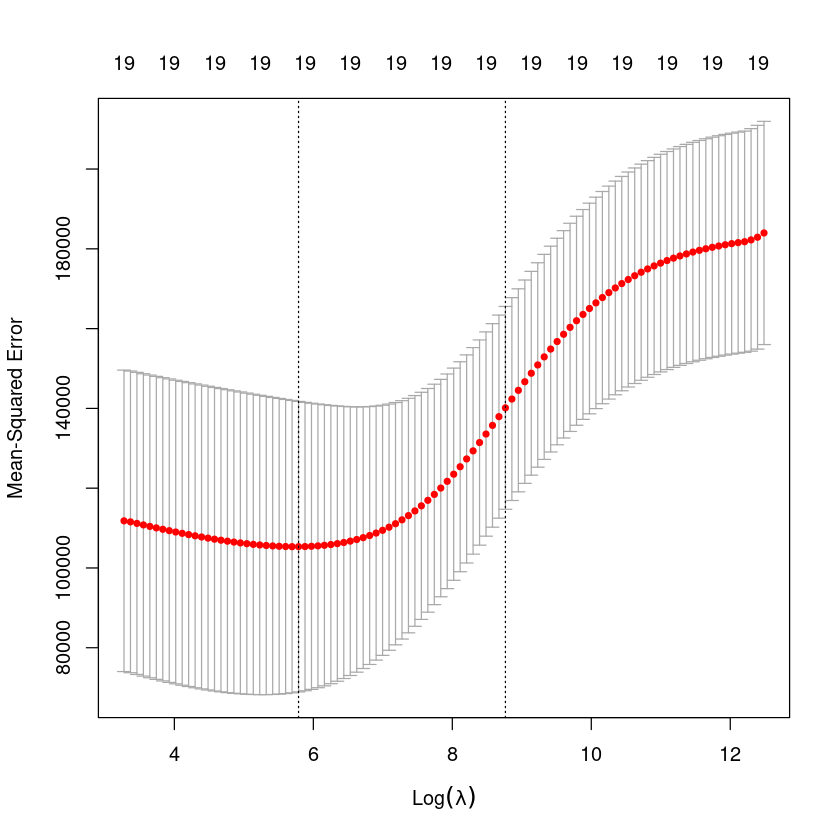

In [51]:
set.seed(1)
cv.out=cv.glmnet(x[train,], y[train], alpha=0)
plot(cv.out)
bestlam=cv.out$lambda.min
bestlam

Por lo tanto, vemos que el valor de lambda que da lugar al menor error de validación cruzada es 326 ¿Cuál es el MSE de la prueba asociada a este valor de lambda?

In [52]:
ridge.pred=predict(ridge.mod, s=bestlam, newx=x[test,])
mean((ridge.pred - y.test)^2)

[1] 139856.6

Esto representa una mejora adicional sobre el MSE de prueba que obtuvimos utilizando lambda = 4. Por último, volvemos a ajustar nuestro modelo de regresión de cresta en el conjunto de datos completo utilizando el valor de lambda elegido por la validación, y examinamos las estimaciones de los coeficientes estimados.

In [53]:
out=glmnet(x, y, alpha=0)
predict(out, type="coefficients", s=bestlam)[1:20,]

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
 15.44383120   0.07715547   0.85911582   0.60103106   1.06369007   0.87936105 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
  1.62444617   1.35254778   0.01134999   0.05746654   0.40680157   0.11456224 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  0.12116504   0.05299202  22.09143197 -79.04032656   0.16619903   0.02941950 
      Errors   NewLeagueN 
 -1.36092945   9.12487765

Como era de esperar, ninguno de los coeficientes es cero: ¡la regresión de cresta no realiza una seleccion de varialbes!

## El Laso

Vimos que la regresión de cresta con una sabia elección de lambda puede superar a los mínimos cuadrados así como el modelo nulo en el conjunto de datos de bateadores (***Hitters***). Ahora nos preguntamos si el lazo puede producir un modelo más preciso o más interpretable que la regresión de cresta. Para ajustar un modelo de laso, una vez más utilizaremos la función ***glmnet()***; sin embargo, esta vez utilizaremos el arguemnto ***alpha=1***. Aparte de este cambio, procedemos igual que en el ajuste de un modelo de cresta.

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


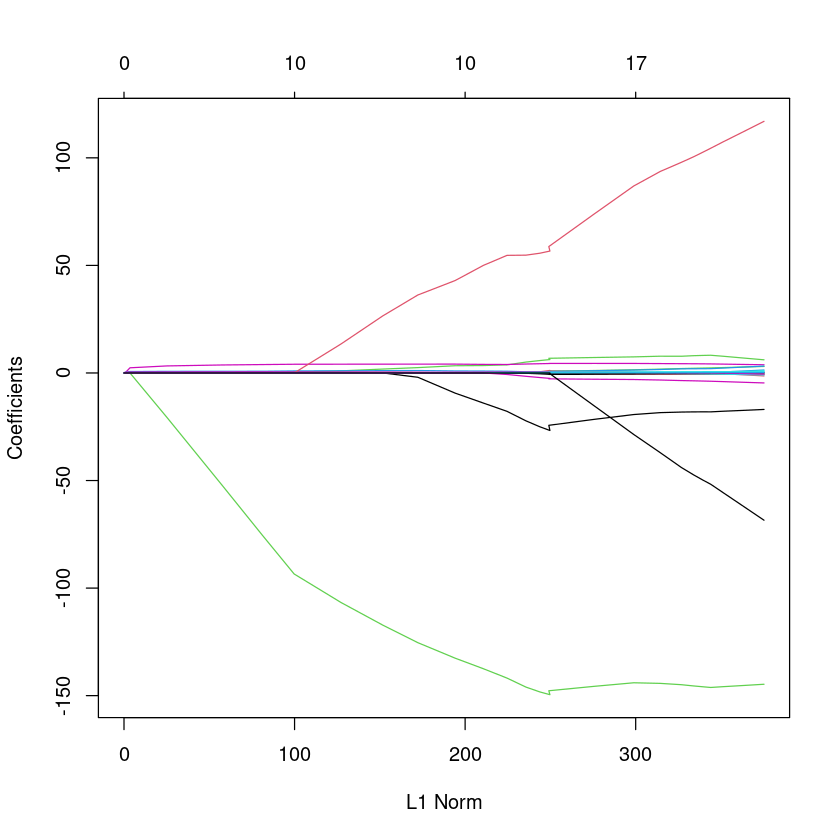

In [54]:
lasso.mod=glmnet(x[train,], y[train], alpha=1, lambda=grid)
plot(lasso.mod)

Podemos ver en el gráfico de coeficientes que, dependiendo de la elección del parámetro de sintonía algunos de los coeficientes serán exactamente iguales a cero. Ahora realziar una validación cruzada y clacular el error de prueba asociado.

[1] 143673.6

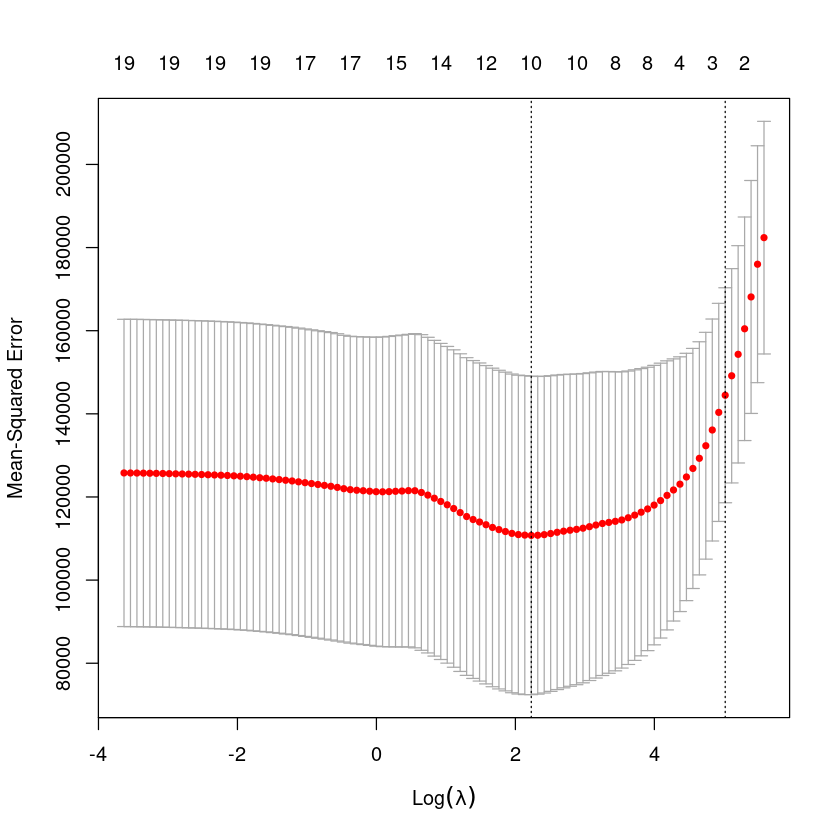

In [55]:
set.seed(1)
cv.out=cv.glmnet(x[train,], y[train], alpha=1)
plot(cv.out)
bestlam=cv.out$lambda.min
lasso.pred=predict(lasso.mod, s=bestlam, newx=x[test,])
mean((lasso.pred - y.test)^2)

Esto es sustancialmente menor que el MSE del conjunto de pruebas del modelo nulo y de mínimos cuadrados, y muy similar al MSE de prueba de regresión de cresta con lambda elegida por validación cruzada. Sin embargo, el lazo tiene una ventaja sustancial sobre la regresión de cresta en que las estiamciones de los coeficientes resultantes son escasas. Aquí vemos que 12 de 19 coeficientes estimados son exactamente cero, Así que el modelo de lazo con lambda elegido por validación cruzada contieene sólo siete variables.

In [56]:
out=glmnet(x, y, alpha=1, lambda=grid)
lasso.coef=predict(out, type="coefficients", s=bestlam)[1:20,]
lasso.coef

(Intercept)         AtBat          Hits         HmRun          Runs 
   1.27479059   -0.05497143    2.18034583    0.00000000    0.00000000 
          RBI         Walks         Years        CAtBat         CHits 
   0.00000000    2.29192406   -0.33806109    0.00000000    0.00000000 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
   0.02825013    0.21628385    0.41712537    0.00000000   20.28615023 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
-116.16755870    0.23752385    0.00000000   -0.85629148    0.00000000

In [57]:
lasso.coef[lasso.coef!=0]

(Intercept)         AtBat          Hits         Walks         Years 
   1.27479059   -0.05497143    2.18034583    2.29192406   -0.33806109 
       CHmRun         CRuns          CRBI       LeagueN     DivisionW 
   0.02825013    0.21628385    0.41712537   20.28615023 -116.16755870 
      PutOuts        Errors 
   0.23752385   -0.85629148

# Regresión PCR y PLS

## Regresión de Componentes Principales (PCR)

La regresión de componentes principales (PCR) peude realizarse utilizando la función ***pcr()***, que forma parte de la biblioteca ***pls***. Ahora aplicamos la PCR a los datos de los bateadores ***Hitters*** para predecir el ***Salary***. Una vez más, asegúrese de que los valores perdidos han sido de los datos.

In [58]:
library(pls)
set.seed(2)
pcr.fit=pcr(Salary~., data=Hitters, scale=TRUE, validation="CV")


Attaching package: ‘pls’


The following object is masked from ‘package:stats’:

    loadings




La sintaxis de la función ***pcr()*** es similar a la de ***lm()***, con algunas opciones adicionales. Establecer ***scale=TRUE*** tiene el efecto de estandarizar cada predictor, utilizando (6.6), antes de generar los componentes principales de modo que la escala en la que se mide cada variable no tendrá efecto. Establecer ***validation="CV"*** hace que ***pcr()*** calcule el error de validación cruzada de diez veces para cada valor posible de M, el número de componentes principales utilizados. El ajuste resultante puede exameninarse mediante ***summary()***.

In [59]:
summary(pcr.fit)

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: svdpc
Number of components considered: 19

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV             452    351.9    353.2    355.0    352.8    348.4    343.6
adjCV          452    351.6    352.7    354.4    352.1    347.6    342.7
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       345.5    347.7    349.6     351.4     352.1     353.5     358.2
adjCV    344.7    346.7    348.5     350.1     350.7     352.0     356.5
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps
CV        349.7     349.4     339.9     341.6     339.2     339.6
adjCV     348.0     347.7     338.2     339.7     337.2     337.6

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         38.31    60.16    70.84    79.03    84.29    88.63    92.26    94.96
Salary    4

La puntuación del CV se proporciona para cada númuero poisible de componentes, desde *M=0* en adelante. (Hemos impreso el resultado del CV sólo hasta *M=4*.) Tenga en cuenta que ***pcr()*** informa del error medio cuadrático; para obtener el MSE habitual, debemos elevar al cuadrado esta cantidad. Por ejemplo. un error medio cuadrático de 352.8 corresponde a un MSE de 124 468. También se pueden trazar las puntuaciones de validación cruzada utilizando la función ***validationplot()***. El uso de ***val.type="MSEP"*** hará que se represente el MSE de validación cruzada.

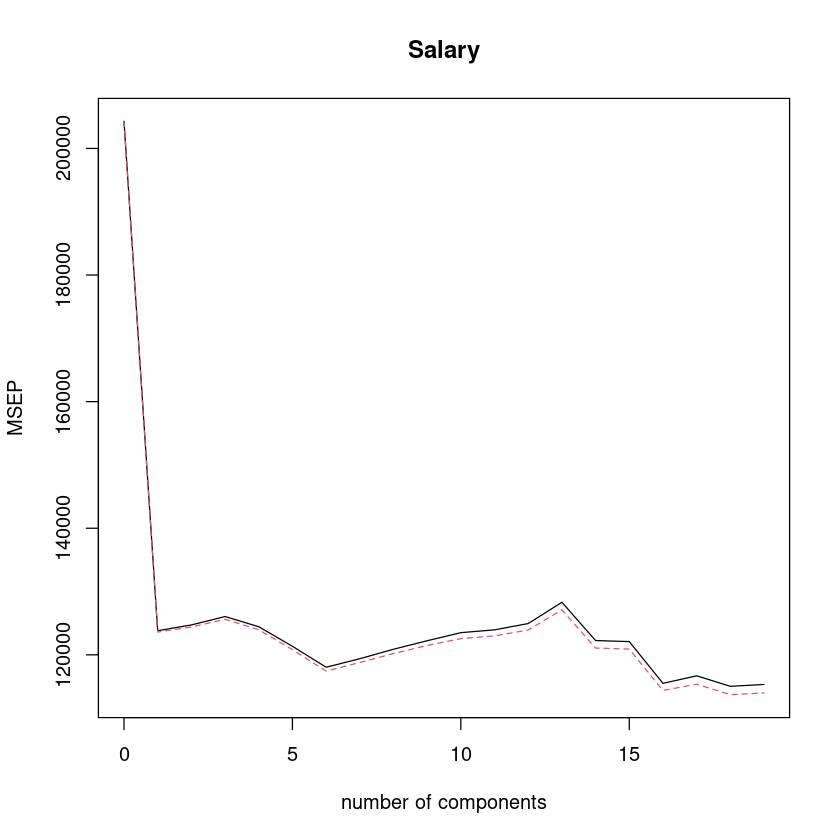

In [60]:
validationplot(pcr.fit, val.type="MSEP")

Vemos que el menor error de validación se produce cuando se utiliza *M=16* componentes. Esto es apenas menos que *M=19*, que equivale a simplemente realziar los mínimos cuadrados, porque cuando se utilizan todos los componentes en la PCR no se produce ninguna reducción de la dimesión. Sin embargo, en el gráfico podmeos ver que el error de validación cruzada es aproximadamente el mismo cuando sólo se incluye un componente en el modelo. Esto sugiere que un modelo que utiliza un pequeño número de componentes podría ser suficiente. La función ***summary()*** también proporciona el porcentaje de varainza explicada en los predictores y en la respuesta utilizando diferentes números de componentes. Brevemente, podemos pensar en esto como la cantidad de información sobre los predicotres o la respuesta que se captura utilizando M componentes principales. Por ejemplo, establecer *M=1* sólo captura el 38.31% de toda la varianza, o información, en los predictores. En cambio, si se utiliza M=6, el valor aumenta hasta el 88.63%. Si se utilizáramos todos los componentes de *M=p=19*, este valor aumentaría al 100%. Ahora realizamos la PCR con los datos de entrenamiento y evaluamos su rendimeinto en el conjunto de pruebas.

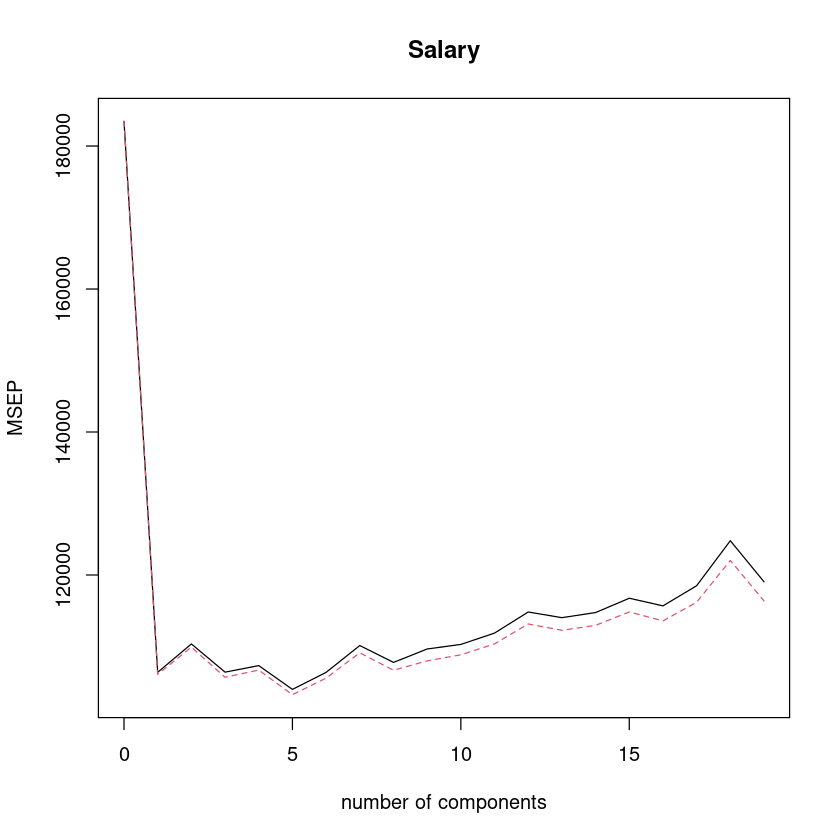

In [61]:
set.seed(1)
pcr.fit=pcr(Salary~., data=Hitters, subset=train, scale=TRUE, validation="CV")
validationplot(pcr.fit, val.type="MSEP")

Ahora econtramos que el menor error de validación cruzada se produce cuando *M=7* de compoinentes. Calculamos el MSE de la rueba como sigue.

In [62]:
pcr.pred=predict(pcr.fit, x[test,], ncomp=7)
mean((pcr.pred - y.test)^2)

[1] 140751.3

El MSE de este conjunto de pruebas compoite con los resultados obtenidos mediante la regresión de crestas y el lazo. Sin embargo, como resultado de la forma en que se implementa la RCP el modelo final es más difícil de interpretar porque no realiza ningún tipo de selección de variables ni produce directamente estimaciones de coeficientes. Por último, ajustamos la PCR al conjunto de datos completo, utilizando *M=7*, el número de componentes idetificados pro la validación cruzada.

In [63]:
pcr.fit=pcr(y~x, scale=TRUE, ncomp=7)
summary(pcr.fit)

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: svdpc
Number of components considered: 7
TRAINING: % variance explained
   1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps
X    38.31    60.16    70.84    79.03    84.29    88.63    92.26
y    40.63    41.58    42.17    43.22    44.90    46.48    46.69


## Mínimos Cuadrados Parciales (PLS)

Implementamos los mínimos caudrados parciales (PLS) utilizando la función ***plsr()***, también en la biblioteca ***pls***. La sintaxis es igual que la de la función ***pcr()***.

In [64]:
set.seed(1)
pls.fit=plsr(Salary~., data=Hitters, subset=train, scale=TRUE, validation="CV")
summary(pls.fit)

Data: 	X dimension: 131 19 
	Y dimension: 131 1
Fit method: kernelpls
Number of components considered: 19

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           428.3    325.5    329.9    328.8    339.0    338.9    340.1
adjCV        428.3    325.0    328.2    327.2    336.6    336.1    336.6
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       339.0    347.1    346.4     343.4     341.5     345.4     356.4
adjCV    336.2    343.4    342.8     340.2     338.3     341.8     351.1
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps
CV        348.4     349.1     350.0     344.2     344.5     345.0
adjCV     344.2     345.0     345.9     340.4     340.6     341.1

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         39.13    48.80    60.09    75.07    78.58    81.12    88.21    90.71
Salary 

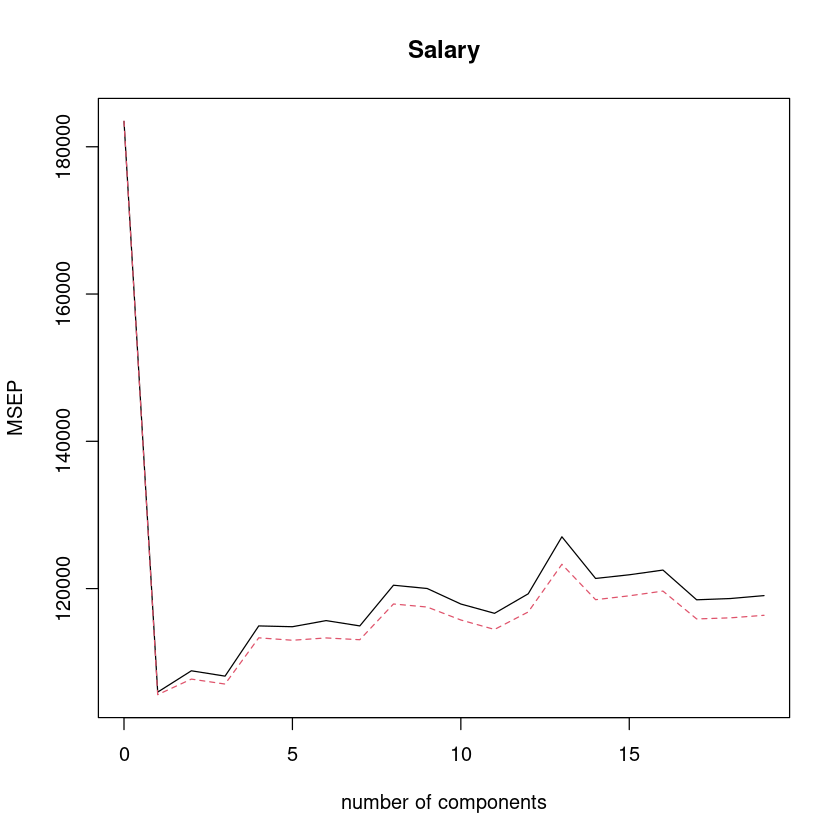

In [65]:
validationplot(pls.fit, val.type="MSEP")

El menor error de validación cruzada se produce cuando sólo se utilizan *M=2* mínimos cuadrados parciales. Ahora evaluamos el conjunto de pruebas correspondiente MSE.

In [66]:
pls.pred=predict(pls.fit, x[test,], ncomp=2)
mean((pls.pred - y.test)^2)

[1] 145367.7

El MSE de la prueba es comparable, aunque ligeramente superior al MSE del prueba obtenido mediante la regresión ridge, el lazo y la PCR. Por último, realizamos el PLS con el conjunto de datos completo, utilizando *M=2*, el número de componentes identificados por la validación cruzada.

In [67]:
pls.fit=plsr(Salary~., data=Hitters, scale=TRUE, ncomp=2)
summary(pls.fit)

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: kernelpls
Number of components considered: 2
TRAINING: % variance explained
        1 comps  2 comps
X         38.08    51.03
Salary    43.05    46.40


Observese que el porcentaje de la varianza de salario ***Salary*** que explica el ajuste PLS de dos componentes, 46.40%, es casi igual al que explica el ajuste PCR del modelo final de siete componentes, 46.69%. Esto se debe a que la PCR sólo intenta maximizar la cantidad de varianza explicada en los predictores, mientras que el PLS busca direcciones que expliquen la varianza tanto en los predictores como en la respuesta.